# Time Series Analysis with ARIMA

    Predicting netflix stock price for the next 24 months using ARIMA

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import warnings
warnings.filterwarnings("ignore")

## Reading data into dataframe 
        Data is taken from www.kaggle.com

In [40]:
data=pd.read_csv('NFLX.csv')
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200


In [41]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [42]:
#checking for null values 
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [50]:
#taking only neccessary columns 
dataset=data[['Date','Close']]

In [51]:
dataset.describe()

,Close
count,5044.000000
mean,116.456338
std,168.668232
min,0.372857
25%,3.958571
50%,25.802856
75%,155.869999
max,691.690002


In [52]:
dataset.dtypes

Date      object
Close    float64
dtype: object

In [53]:
dataset.tail()

,Date,Close
5039,2022-05-27,195.190002
5040,2022-05-31,197.440002
5041,2022-06-01,192.910004
5042,2022-06-02,205.089996
5043,2022-06-03,198.979996


In [54]:
#converting date column in datetime 
dataset['Date']= pd.to_datetime(dataset['Date']).dt.to_period('M')
dataset=(dataset.groupby(['Date']).mean()).reset_index()
# taking data for last 4 years
dataset=dataset.loc[dataset['Date']>'2017-06']
dataset=dataset.reset_index(drop=True)
print(dataset.head())

      Date       Close
0  2017-07  169.446500
1  2017-08  172.389564
2  2017-09  181.666501
3  2017-10  194.277727
4  2017-11  195.223333


In [55]:
len(dataset)

60

In [56]:
dataset.tail()

,Date,Close
55,2022-02,400.986317
56,2022-03,366.791741
57,2022-04,297.414499
58,2022-05,186.449524
59,2022-06,198.993332


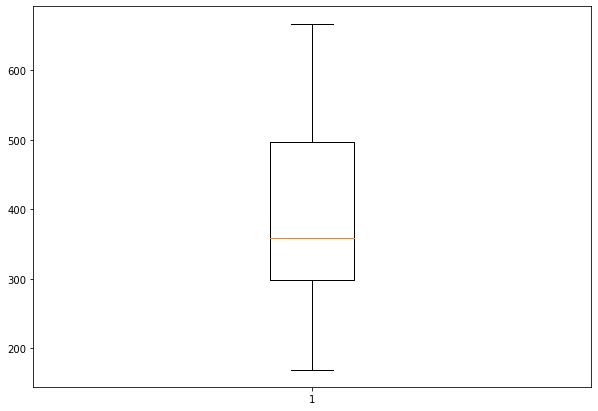

In [57]:
#show box plot for closing price to check for outlier
fig = mp.figure(figsize =(10, 7)) #defining figure size
mp.boxplot(dataset['Close'])
mp.show()

<AxesSubplot:xlabel='Date'>

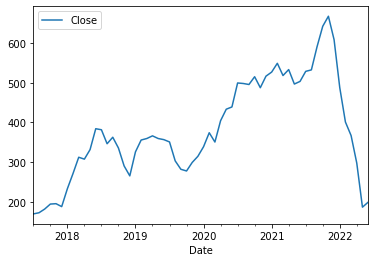

In [58]:
dataset.plot( x='Date',y = 'Close')

# ARIMA

## Using ARIMA to forecast for netflix stock prices for the next 24 months

ARIMA - AutoRegressive Integrated Moving Average, An ARIMA model is a class of statistical models for analyzing and forecasting time series data based on past values

A ARIMA model is classified as an "ARIMA(p,d,q)" model, where:

AR(p) is the number of autoregressive terms,
I(d) is the number of nonseasonal differences needed for stationarity, and
MA(d) is the number of lagged forecast errors in the prediction equation.

### Check for stationarity of time series

Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is    stationary.

Using ADF test to check stationarity of time series 

In [59]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.095756
p-value: 0.246224
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


<AxesSubplot:xlabel='Date'>

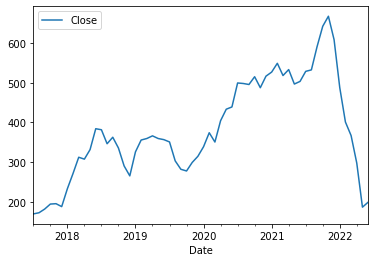

In [60]:
dataset.plot( x='Date',y = 'Close')

In [61]:
dataset.head(2)

,Date,Close
0,2017-07,169.446500
1,2017-08,172.389564


#### Since the p value >0.05 (critical value). We will try 1st order of differencing 

ADF Statistic: -4.693772
p-value: 0.000086
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


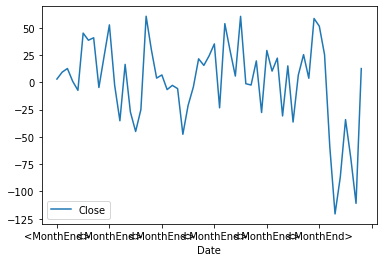

In [62]:
dataset_1stdiff=dataset.diff().dropna()
dataset_1stdiff.plot( x='Date',y = 'Close')
result = adfuller(dataset_1stdiff['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

For 1st order of differencing the p value <0.05. Hence we will choose I(d)=1

#### Determing the p and q values using acf and pacf plot

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

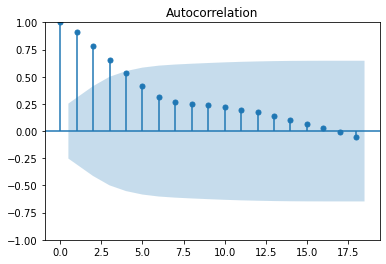

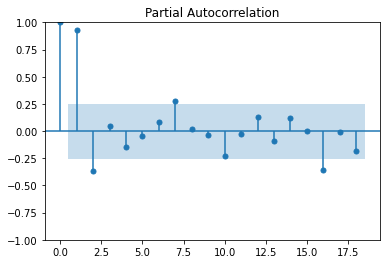

In [93]:
plot_acf(dataset['Close'],alpha=0.05)
mp.show()
plot_pacf(dataset['Close'],alpha=0.05)
mp.show()

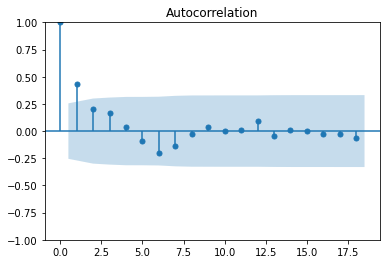

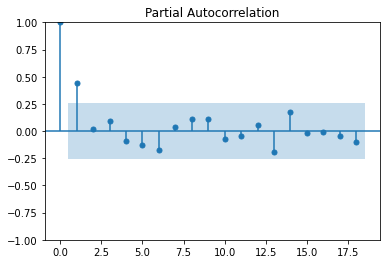

In [94]:
plot_acf(dataset_1stdiff['Close'],alpha=0.05)
mp.show()
plot_pacf(dataset_1stdiff['Close'],alpha=0.05)
mp.show()

We can select the order p for AR(p) model based on significant spikes from the PACF plot. We can see significant lag at 1, So we can choose p=1

We can select the order q for MA(q) model based on significant spikes from the ACF plot. We can see significant lag at 1, So we can choose p=1

In [68]:
from statsmodels.tsa.arima.model import ARIMA
#model building 
model=ARIMA(dataset['Close'].values,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())


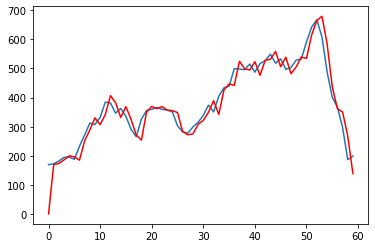

In [71]:
mp.plot(dataset['Close'], label='actuals')
mp.plot(model_fit.fittedvalues,color='red')

In [72]:
predictions=pd.Series(model_fit.fittedvalues)


#### Error Calculation

In [73]:
actuals=dataset['Close']

In [75]:
error=(np.mean(np.abs(predictions - actuals)/np.abs(actuals)))*100
error

9.123395635252168

#### Predicting next 24 months

In [76]:
forecast=model_fit.predict(len(dataset),len(dataset)+23)
print(forecast)

[201.19762073 202.2503723  202.75315846 202.99328531 203.10796807
 203.16273969 203.1888982  203.2013913  203.20735792 203.21020753
 203.21156848 203.21221846 203.21252888 203.21267714 203.21274795
 203.21278176 203.21279791 203.21280563 203.21280931 203.21281107
 203.21281191 203.21281231 203.2128125  203.21281259]


In [77]:
dataset.tail()

,Date,Close
55,2022-02,400.986317
56,2022-03,366.791741
57,2022-04,297.414499
58,2022-05,186.449524
59,2022-06,198.993332


Joining forecast values with actuals values

In [80]:
df1 = pd.DataFrame(pd.date_range(start='2022-07', end='2024-06'), columns=['Date'])
df1['Date']= pd.to_datetime(df1['Date']).dt.to_period('M')
df1=(df1.groupby(['Date']).mean()).reset_index()
df1['Close']=pd.DataFrame(forecast)
final_dataset=dataset.append(df1).reset_index(drop=True)

# Netfix Stock Forecast for next 24 months

In [81]:
final_dataset

,Date,Close
0,2017-07,169.446500
1,2017-08,172.389564
2,2017-09,181.666501
3,2017-10,194.277727
4,2017-11,195.223333
...,...,...
79,2024-02,203.212811
80,2024-03,203.212812
81,2024-04,203.212812
82,2024-05,203.212813
